3.	Regression on the tabular data

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for internship_hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:<br>
●	jupyter notebook with analysis; <br>
●	code for modeling (Python 3); <br>
●	file with model predictions; <br>
●	readme file;<br>
●	requirements.txt file.


In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv(Path("../internship_train.csv"))


### Loading data

In [3]:
pd.set_option("display.max_columns", 60)


### Take a Quick Look at the Data Structure

In [4]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

From the above result, we can see that all attributes contain only numeric values and there is no missing data.

In [6]:
df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,249.818967,249.346778,249.899900,7.483940,7.498037,7.496259,7.501635,7.486463,7.523043,7.475585,7.494835,7.503939,7.507724,7.508681,7.472421,7.519205,7.515753,7.509402,7.496781,7.504014,7.494212,7.490808,7.486936,7.514508,7.491614,7.520193,7.507801,7.493713,7.513840,7.507033,7.479579,7.519826,7.502483,7.512965,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,144.363827,144.476128,144.310495,4.330908,4.318388,4.338732,4.345618,4.318031,4.323500,4.327327,4.325447,4.330159,4.332599,4.328966,4.345228,4.339104,4.333907,4.331007,4.334982,4.318553,4.327286,4.322672,4.329524,4.329973,4.333144,4.335244,4.329515,4.327480,4.333543,4.327670,4.326175,4.315565,4.333881,4.329929,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000252,0.000190,0.000192,0.000067,0.000229,0.000125,0.000382,0.000398,0.000140,0.000382,0.000129,0.000192,0.000017,0.000080,0.000161,0.000437,0.000041,0.000070,0.000074,0.000111,0.000067,0.000078,0.000018,0.000094,0.000020,0.000106,0.000105,0.000273,0.000315,0.000060,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,126.000000,124.000000,125.000000,3.723392,3.763626,3.718755,3.719537,3.758746,3.778857,3.733780,3.748951,3.760261,3.742810,3.768145,3.685140,3.760790,3.746467,3.772795,3.741697,3.774239,3.743116,3.763061,3.750034,3.778028,3.743842,3.752848,3.776405,3.755325,3.754465,3.771945,3.731527,3.784809,3.763004,3.768044,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,250.000000,249.000000,251.000000,7.483265,7.505267,7.502682,7.515240,7.467721,7.539462,7.460267,7.481500,7.521563,7.520793,7.520739,7.484349,7.526894,7.528984,7.494876,7.491009,7.500083,7.514475,7.483334,7.458614,7.513794,7.475324,7.550623,7.484699,7.472789,7.518614,7.504101,7.452493,7.532363,7.511806,7.507058,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,375.000000,375.000000,375.000000,11.242883,11.228331,11.258049,11.284618,11.238904,11.254751,11.211187,11.238128,11.248749,11.244657,11.240915,11.239795,11.276738,11.272683,11.271486,11.257988,11.233189,11.223296,11.229486,11.245719,11.272623,11.241922,11.261178,11.255442,11.251097,11.270277,11.241504,11.222543,11.241135,11.255483,11.272459,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.00000

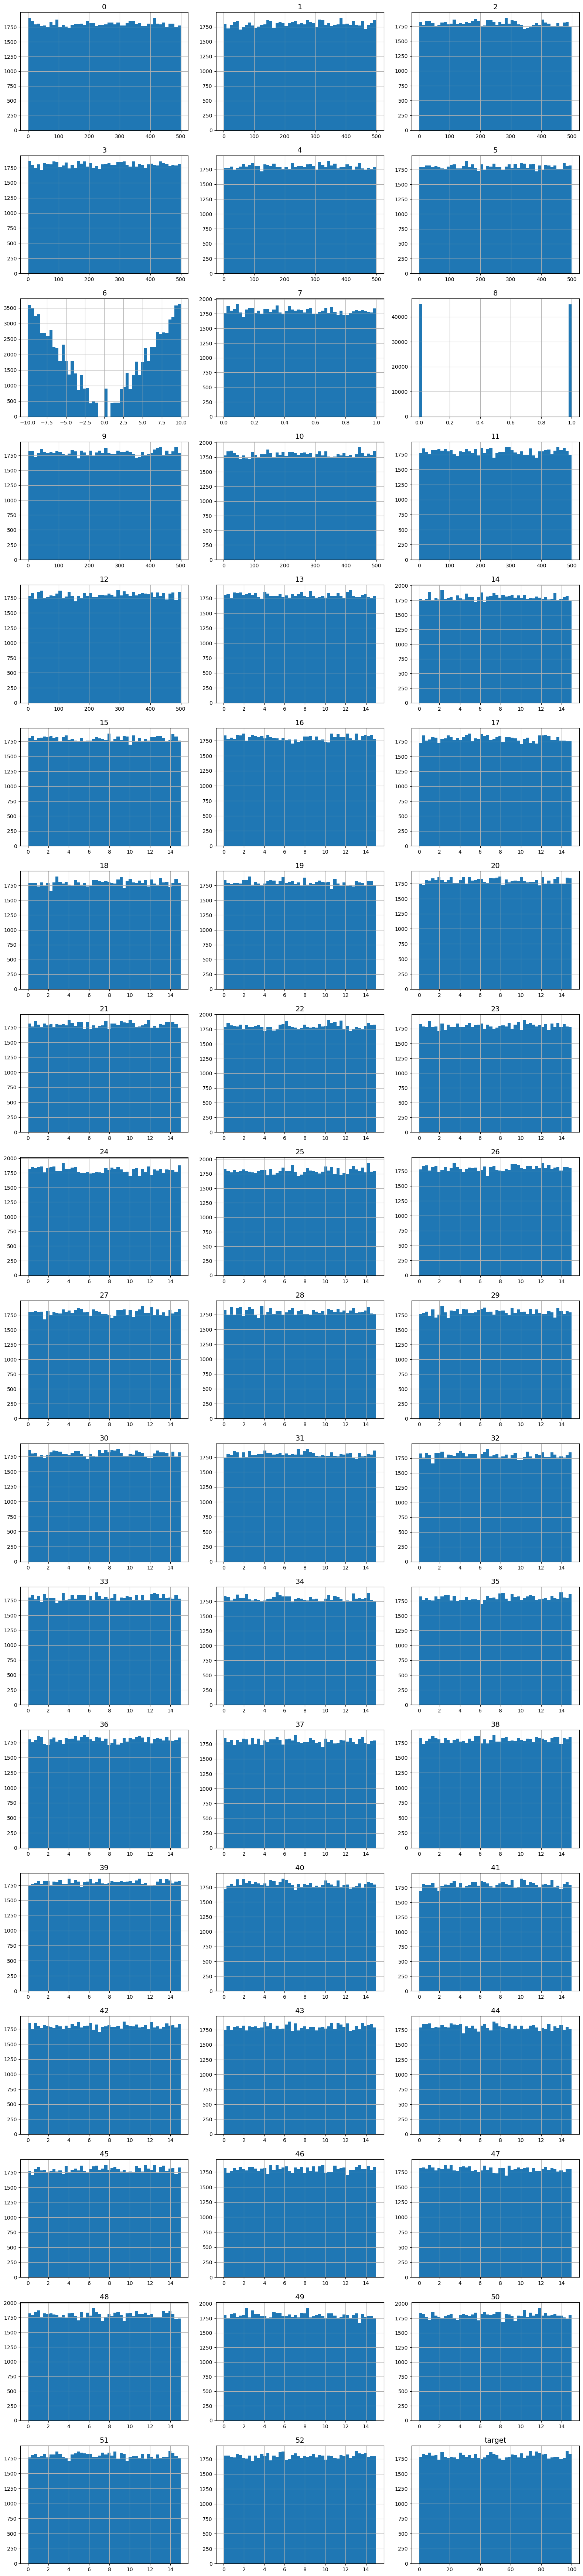

In [7]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

ncols = 3
nrows = len(df.columns) // ncols + 1

df.hist(bins=50, layout=(nrows, ncols), figsize=(16, 80))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


From the graphs above, we can see that all attributes except `6` are distributed almost evenly.

Let's look for correlations between attribute `6` and `target`

<Axes: xlabel='6', ylabel='target'>

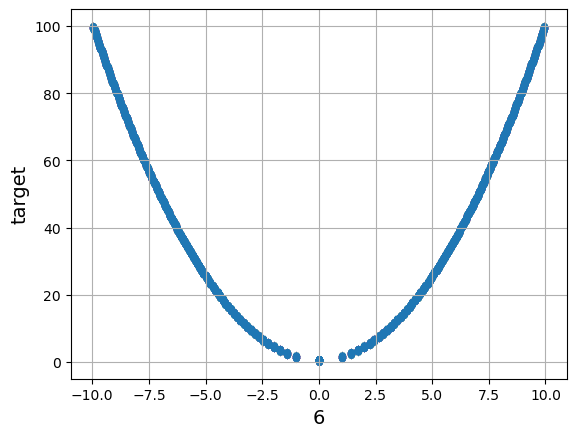

In [8]:
df.plot(kind="scatter", x="6", y="target", grid=True, alpha=0.01)


It looks like we were lucky and got a strong nonlinear correlation

Let's look if there is some linear correlations between attrinutes

Text(0.5, 1.0, 'Correlation Matrix')

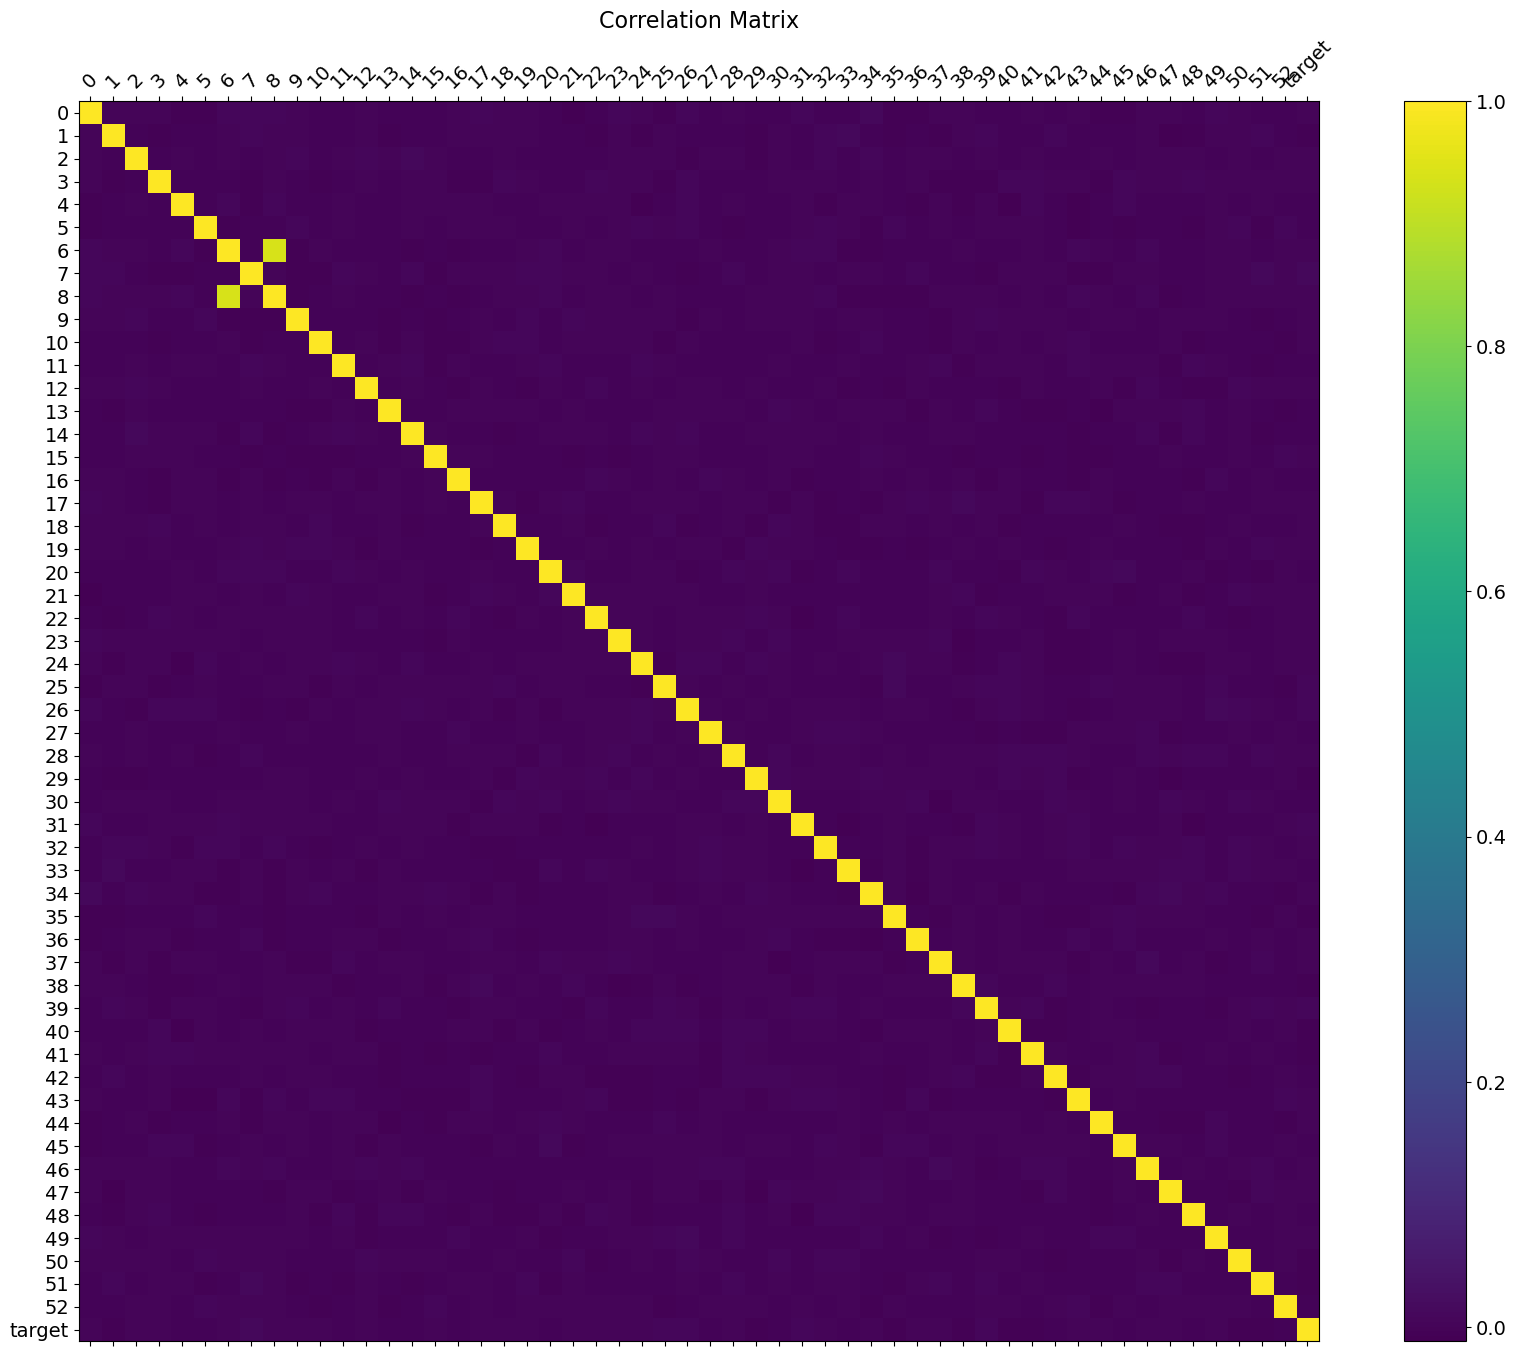

In [9]:
f = plt.figure(figsize=(22, 16))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(
    range(df.select_dtypes(["number"]).shape[1]),
    df.select_dtypes(["number"]).columns,
    fontsize=14,
    rotation=45,
)
plt.yticks(
    range(df.select_dtypes(["number"]).shape[1]),
    df.select_dtypes(["number"]).columns,
    fontsize=14,
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix", fontsize=16)


Unfortunately, there is only one linear correlation between attributes `6` and `8`

<Axes: xlabel='6', ylabel='8'>

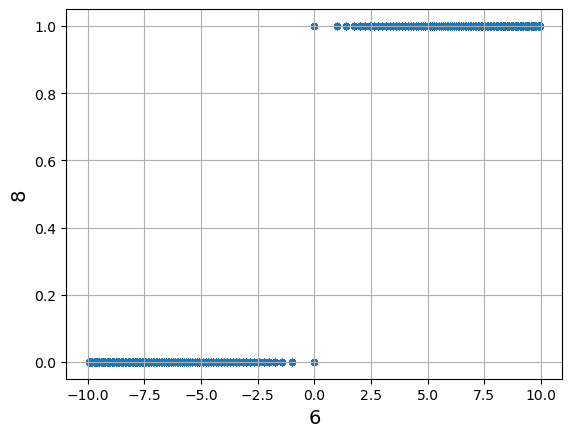

In [10]:
df.plot(kind="scatter", x="6", y="8", grid=True, alpha=0.01)


In [11]:
df.loc[df["6"] == 0, "8"].value_counts()


1    468
0    435
Name: 8, dtype: int64

It seems like `8` points to the sign of `6` with some uncertainty about zero

Building theories and experimenting with attributes without having any prior knowlage about them or knowing theirs area of use is untrivial task so let's go streigh to building data pipeline and training some base models.

Split dataset on features and labels

### Prepare the Data for Machine Learning Algorithms

Split data on features matrix and labels vector

In [12]:
X = df.drop("target", axis=1)
y = df["target"].copy()


#### LinearRegression

Train fast and simple linear regression as base model

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)


In [14]:
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(lin_reg, X, y, scoring="neg_root_mean_squared_error", cv=3)

pd.Series(lin_rmses).describe()


count     3.000000
mean     28.907382
std       0.019246
min      28.894659
25%      28.896311
50%      28.897962
75%      28.913743
max      28.929523
dtype: float64

Model shows not the best results and probably underfitting as we did see any linear corelations with `target`

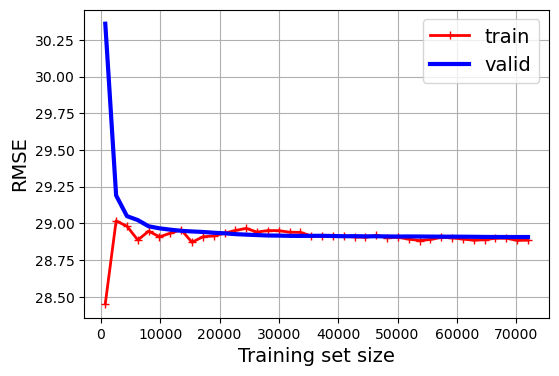

In [15]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg,
    X,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")

plt.show()


As we see regressor almost immediately came to platou and stopped to react on data size which indicate severe underfitting

Let's now add polynomial features combinations to overcome underfitting and maybe even find some hiden relationships between features. We also need to scale our features so large values features not to overshade low values features.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

preprocessing = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), StandardScaler()
)

X_prepared = preprocessing.fit_transform(X)

lin_rmses = -cross_val_score(
    lin_reg, X_prepared, y, scoring="neg_root_mean_squared_error", cv=3
)

pd.Series(lin_rmses).describe()


count    3.000000e+00
mean     3.161844e-13
std      3.835168e-14
min      2.846466e-13
25%      2.948382e-13
50%      3.050297e-13
75%      3.319533e-13
max      3.588768e-13
dtype: float64

Model results looks very promising but training time is rather high, so let's try to find simpler model which will get similar results after it's tuning and some additional features transformations

Train a model with just one `6` feature

In [17]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), StandardScaler()
)

one_feature = np.array(X["6"]).reshape(-1, 1)
one_feature_prepared = preprocessing.fit_transform(one_feature)

lin_rmses = -cross_val_score(
    lin_reg, one_feature_prepared, y, scoring="neg_root_mean_squared_error", cv=3
)

pd.Series(lin_rmses).describe()


count    3.000000
mean     0.288693
std      0.000784
min      0.287794
25%      0.288425
50%      0.289056
75%      0.289143
max      0.289231
dtype: float64

 One feature model looks good with RMSE equal to `0.29` when `target's mean` equal to `50.03` but it is much worse than model with all features

#### ExtraTreesRegressor

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree_rmses = -cross_val_score(
    ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    X,
    y,
    scoring="neg_root_mean_squared_error",
    cv=3,
)

pd.Series(extra_tree_rmses).describe()


count    3.000000
mean     0.003106
std      0.000048
min      0.003057
25%      0.003082
50%      0.003107
75%      0.003130
max      0.003153
dtype: float64

`ExtraTreesRegressor` show himself mutch worse than `LinearRegression` despite being faster. But we can use it `feature_importances_` atribute to reduce features number in dataset 

In [19]:
extra_tree_reg = ExtraTreesRegressor(n_estimators=50, random_state=42, n_jobs=-1)
extra_tree_reg.fit(X, y)


ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [20]:
extra_tree_reg.feature_importances_


array([2.55586466e-09, 2.74899498e-09, 3.18296252e-09, 2.65666361e-09,
       3.07347676e-09, 2.72112231e-09, 9.53709444e-01, 9.94240934e-05,
       4.61909916e-02, 2.51216260e-09, 2.50713566e-09, 3.12140999e-09,
       2.89752451e-09, 2.82677446e-09, 2.78208949e-09, 2.77774704e-09,
       3.41453780e-09, 2.84906293e-09, 2.38901732e-09, 2.67058891e-09,
       2.86544474e-09, 2.37469382e-09, 2.48540517e-09, 2.30984738e-09,
       2.57910927e-09, 3.03369537e-09, 3.14380749e-09, 2.63855017e-09,
       2.85965671e-09, 3.12428424e-09, 2.71324280e-09, 2.45510123e-09,
       2.77836193e-09, 3.09238180e-09, 3.00536608e-09, 2.82119755e-09,
       2.77992685e-09, 2.88523566e-09, 2.48532003e-09, 3.01396835e-09,
       3.10146002e-09, 3.29048214e-09, 2.83102322e-09, 3.02103600e-09,
       2.63205183e-09, 2.69032956e-09, 2.81012070e-09, 2.70612512e-09,
       2.49314083e-09, 3.08365396e-09, 2.66414257e-09, 2.90595597e-09,
       3.26456016e-09])

In [21]:
X_new = X.iloc[:, extra_tree_reg.feature_importances_ > 1e-8]


In [22]:
preprocessing = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), StandardScaler()
)

X_prepared_new = preprocessing.fit_transform(X_new)

lin_rmses = -cross_val_score(
    lin_reg, X_prepared_new, y, scoring="neg_root_mean_squared_error", cv=5
)

pd.Series(lin_rmses).describe()


count    5.000000e+00
mean     2.022996e-13
std      1.298184e-13
min      5.181294e-14
25%      1.423141e-13
50%      1.537458e-13
75%      2.805187e-13
max      3.831064e-13
dtype: float64

Now our linear model gives good results in much shorter time

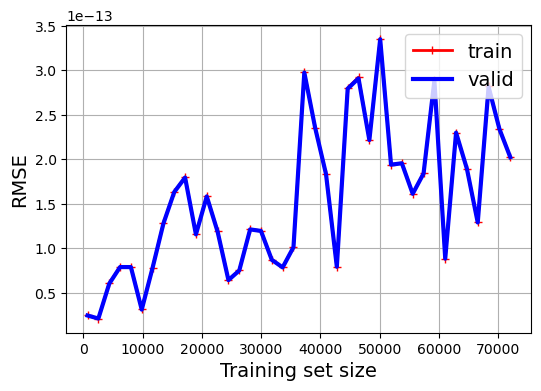

In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(n_jobs=-1),
    X_prepared_new,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")

plt.show()


But now it severely overfits and need some regurelazation

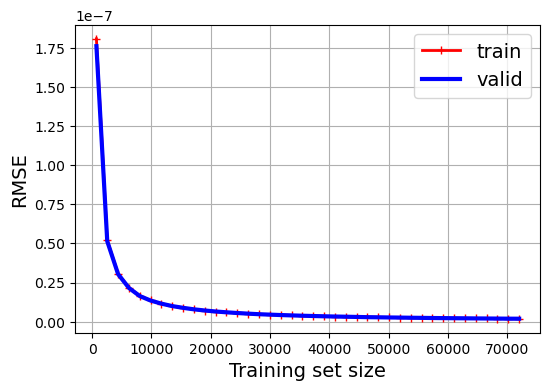

In [24]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=1e-6),
    X_prepared_new,
    y,
    train_sizes=np.linspace(0.01, 1.0, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")

plt.show()


Even Small coefficient of l2 regurelization is enough